In [2]:
import pandas as pd
import os 
import random
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd
import numpy as np

from statsmodels.stats.multitest import multipletests
from adjustText import adjust_text


In [3]:
biovar = 'bio18'

In [4]:
import pickle

# Define the colors in a dictionary
color_mapping = {
    'lfmm': "green",  # LFMM color
    'binom_reg': "purple",  # Binomial Regression color
    'kendall': "orange",  # Kendall color
    'lfmm_binom': "#DDA77E",  # LFMM + Binomial Regression
    'lfmm_kendall': "#CC7B3E",  # LFMM + Kendall
    'binom_kendall': "#915527",  # Binomial Regression + Kendall
    'all_combined': "#E76D83",  # All models combined
    'default_grey': "grey"  # Default grey
}

# Save the color mapping as a pickle file
with open('color_mapping.pkl', 'wb') as f:
    pickle.dump(color_mapping, f)

print("Color mapping saved as 'color_mapping.pkl'")

Color mapping saved as 'color_mapping.pkl'


In [5]:
import pickle

# Define the colors in a dictionary
color_mapping = {
    'lfmm': "#2aad2a",  # LFMM color
    'binom_reg': "#208420",  # Binomial Regression color
    'kendall': "#006400",  # Kendall color
    'lfmm_binom': "#DDA77E",  # LFMM + Binomial Regression
    'lfmm_kendall': "#CC7B3E",  # LFMM + Kendall
    'binom_kendall': "#915527",  # Binomial Regression + Kendall
    'all_combined': "#E76D83",  # All models combined
    'default_grey': "grey"  # Default grey
}

# Save the color mapping as a pickle file
with open('color_mapping.pkl', 'wb') as f:
    pickle.dump(color_mapping, f)

print("Color mapping saved as 'color_mapping.pkl'")

Color mapping saved as 'color_mapping.pkl'


In [6]:
green_colors = ['#2aad2a', '#208420'] # '#006400', '#32CD32', '#006400', '#32CD32']  # Dark and light greens

In [7]:
biovar= 'bio18'

In [8]:
# Load color mapping from pickle file
with open('color_mapping.pkl', 'rb') as f:
    color_mapping = pickle.load(f)

# Define a helper function to check for shared significant points
def get_shared_significant_points(df1, df2, df3):
    shared_positions = set(df1['adjusted_position']).intersection(set(df2['adjusted_position']), set(df3['adjusted_position']))
    return shared_positions


In [9]:
color_mapping

{'lfmm': '#2aad2a',
 'binom_reg': '#208420',
 'kendall': '#006400',
 'lfmm_binom': '#DDA77E',
 'lfmm_kendall': '#CC7B3E',
 'binom_kendall': '#915527',
 'all_combined': '#E76D83',
 'default_grey': 'grey'}

In [10]:
greyscale_colors = ['#666666', '#BBBBBB', '#444444']

In [65]:
s_small = 60

In [66]:

# Load the first GWAS data
wza_lfmm = pd.read_csv(f'../wza_last_gen/wza_results_lfmm_{biovar}_poly7.csv')

# Extract chromosome and position from the gene column
wza_lfmm['chrom'] = wza_lfmm['gene'].str.split('_').str[0].astype(int)
wza_lfmm['pos'] = wza_lfmm['gene'].str.split('_').str[1].astype(int)

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df1 = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df1['chromosome'] = df1['chrom']
df1['position'] = df1['pos']


# Apply Bonferroni correction
df1['Bonferroni_corrected_pval'] = multipletests(df1['Z_pVal'], method='fdr_bh')[1]
df1['-log10(pvalue)'] = -np.log10(df1['Z_pVal'])
# Load the second GWAS data
binomial_reg = pd.read_csv(f'../wza_last_gen/wza_binomial_regression_{biovar}_poly7.csv')

# Extract chromosome and position from the gene column
binomial_reg['chrom'] = binomial_reg['gene'].str.split('_').str[0].astype(int)
binomial_reg['pos'] = binomial_reg['gene'].str.split('_').str[1].astype(int)

# Create chrom_pos in binomial_reg by combining 'chrom' and 'pos'
binomial_reg['chrom_pos'] = binomial_reg['chrom'].astype(str) + '_' + binomial_reg['pos'].astype(str)

# Copy the relevant columns for plotting
df2 = binomial_reg[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df2['chromosome'] = df2['chrom']
df2['position'] = df2['pos']


# Apply Bonferroni correction
df2['Bonferroni_corrected_pval'] = multipletests(df2['Z_pVal'], method='fdr_bh')[1]
df2['-log10(pvalue)'] = -np.log10(df2['Z_pVal'])

# Load the third GWAS data
wza_kendall = pd.read_csv(f'../wza_last_gen/wza_kendalltau_results_{biovar}_poly7.csv')

# Extract chromosome and position from the gene column
wza_kendall['chrom'] = wza_kendall['gene'].str.split('_').str[0].astype(int)
wza_kendall['pos'] = wza_kendall['gene'].str.split('_').str[1].astype(int)

# Create chrom_pos in wza_kendall by combining 'chrom' and 'pos'
wza_kendall['chrom_pos'] = wza_kendall['chrom'].astype(str) + '_' + wza_kendall['pos'].astype(str)

# Copy the relevant columns for plotting
df3 = wza_kendall[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df3['chromosome'] = df3['chrom']
df3['position'] = df3['pos']


# Apply Bonferroni correction
df3['Bonferroni_corrected_pval'] = multipletests(df3['Z_pVal'], method='fdr_bh')[1]
df3['-log10(pvalue)'] = -np.log10(df3['Z_pVal'])
# Calculate chromosome offsets to prevent overlap for all datasets
chromosome_offsets = {}
offset = 0
for chrom in sorted(pd.concat([df1['chromosome'], df2['chromosome'], df3['chromosome']]).unique()):
    chromosome_offsets[chrom] = offset
    max_position = max(df1[df1['chromosome'] == chrom]['position'].max(), 
                       df2[df2['chromosome'] == chrom]['position'].max(),
                       df3[df3['chromosome'] == chrom]['position'].max())
    offset += max_position + 300  # Add buffer to prevent overlap

# Apply offsets to the position for all datasets
df1['adjusted_position'] = df1.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
df2['adjusted_position'] = df2.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
df3['adjusted_position'] = df3.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)


In [86]:
annot = pd.read_csv('genes_info_BH_tair10_bio18.csv')

In [87]:
#annot = pd.read_csv('bh_genes_tair10.csv')

annot = annot[annot['gen']!='first_gen']

#annot = annot[annot['related_to'].notna()]

annot = annot.merge(df3[['chrom_pos', 'adjusted_position']], left_on = 'block_id', right_on = 'chrom_pos')

significant_df1 = df1[df1['Bonferroni_corrected_pval'] <= 0.05]
significant_df2 = df2[df2['Bonferroni_corrected_pval'] <= 0.05]
significant_df3 = df3[df3['Bonferroni_corrected_pval'] <= 0.05]

In [88]:
len(annot)

23

In [89]:
annot = pd.concat([significant_df1[['chrom_pos', '-log10(pvalue)']].merge(annot, left_on = 'chrom_pos', right_on = 'block_id'),
                                                                  significant_df2[['chrom_pos', '-log10(pvalue)']].merge(annot, left_on = 'chrom_pos', right_on = 'block_id'),
                                                                  significant_df3[['chrom_pos', '-log10(pvalue)']].merge(annot, left_on = 'chrom_pos', right_on = 'block_id')])

In [90]:
annot = annot.sort_values('-log10(pvalue)').drop_duplicates('gene_name',keep='last')

In [91]:
annot = annot.drop_duplicates(subset = ['block_id'], keep='first')

In [92]:
annot

,chrom_pos_x,-log10(pvalue),block_id,model,gen,source,gene_name,description,chrom_pos_y,adjusted_position
5,4_2093,4.182194,4_2093,wza_binom_reg_l,last_gen,TAIR10,HSF A4A,Encodes a member of Heat Stress Transcription ...,4_2093,13734
1,1_2249,4.205437,1_2249,wza_binom_reg_l,last_gen,TAIR10,ILL6,encodes a protein similar to IAA amino acid co...,1_2249,2249
1,1_1779,4.311451,1_1779,wza_kendall_l,"last_gen,first_gen",TAIR10,BGAL15,Encodes a putative &beta;-galactosidase.,1_1779,1779
3,4_1194,4.456633,4_1194,wza_binom_reg_l,last_gen,TAIR10,PRD1,Encodes a protein that is involved in meiotic ...,4_1194,12835
4,4_1343,4.555550,4_1343,wza_binom_reg_l,last_gen,TAIR10,ATCSLB05,Encodes a gene similar to cellulose synthase. ...,4_1343,12984
0,2_841,4.814899,2_841,wza_lfmm_l,last_gen,TAIR10,ATSERAT3;1,Encodes a cytosolic serine O-acetyltransferase...,2_841,6311
9,5_2486,4.815450,5_2486,wza_lfmm_l,last_gen,TAIR10,ILL3,encodes a protein similar to IAA amino acid co...,5_2486,17488
4,4_1126,5.066397,4_1126,wza_kendall_l,last_gen,TAIR10,AT-HSFA5,member of Heat Stress Transcription Factor (Hs...,4_1126,12767
3,2_723,5.160627,2_723,wza_kendall_l,"last_gen,first_gen",TAIR10,AGP9,putative proline-rich protein (At2g14890) mRNA...,2_723,6193
2,2_89,5.172598,2_89,wza_binom_reg_l,last_gen,TAIR10,RGA1,Member of the VHIID/DELLA regulatory family. C...,2_89,5559


In [93]:
from adjustText import adjust_text


In [94]:
fontisize = 12

In [95]:
alpha_colors =1
alpha_lines = 1
alpha_grey_dots = 0.7

In [96]:
s_small = 30

In [97]:
all = pd.concat([df1, df2, df3])
significance_line = all[all['Bonferroni_corrected_pval'] < 0.05]['-log10(pvalue)'].min()

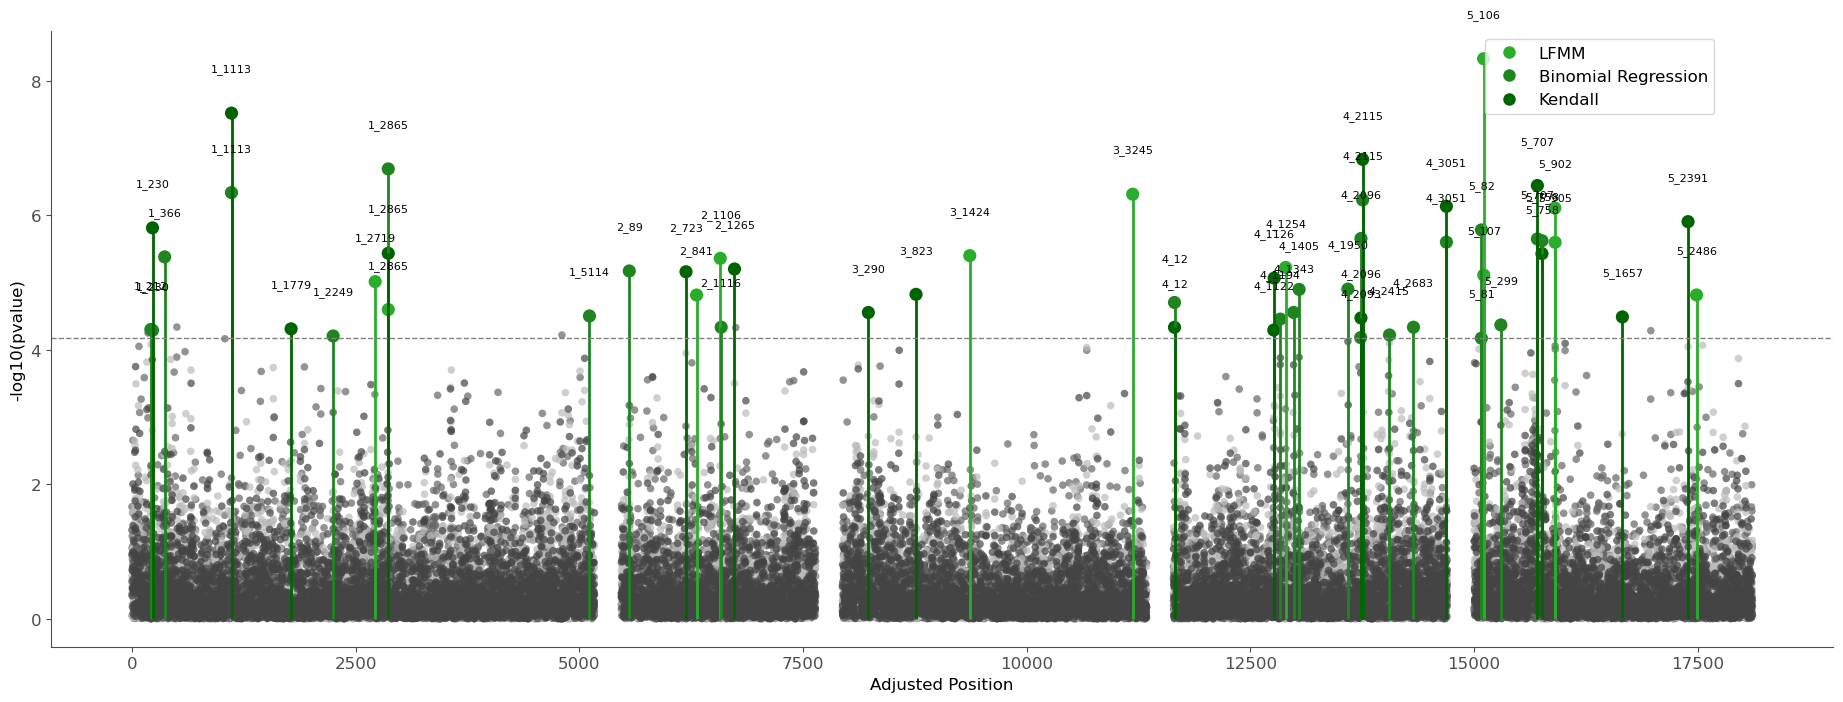

In [98]:
# Create the Manhattan plot
plt.figure(figsize=(23, 8))

# Plot the first dataset (LFMM)
for chrom in sorted(df1['chromosome'].unique()):
    subset = df1[df1['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant_df1 = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=alpha_grey_dots, 
        edgecolor='none',  # No edge color
        c=greyscale_colors[0],  # Same color as significant points
        s=s_small,  # Smaller size for non-significant points
    )
    
    # Plot significant points in alternating shades of green with bigger size
    plt.scatter(
        significant_df1['adjusted_position'],
        significant_df1['-log10(pvalue)'],
        alpha=alpha_colors, 
        edgecolor='none',  # No edge color
        c=color_mapping['lfmm'],  # Alternate green color shades
        s=90,  # Bigger size for significant points
    )
    # Add vertical lines for significant points
    plt.vlines(
        significant_df1['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant_df1['-log10(pvalue)'],
        color=color_mapping['lfmm'],  # Same color as the significant dots
        alpha=alpha_lines,
        linewidth=2,  # Adjust line width as necessary
    )
    for i, row in significant_df1.iterrows():
        plt.annotate(
            row['chrom_pos'],  # Value to annotate
            (row['adjusted_position'], row['-log10(pvalue)']),  # Coordinates of the point
            textcoords="offset points",  # Position of the annotation
            xytext=(0,30),  # Offset to slightly position above the dot
            ha='center',  # Horizontal alignment
            fontsize=8  # Font size for annotation
        )
# Plot the second dataset (Binomial Regression)
for chrom in sorted(df2['chromosome'].unique()):
    subset = df2[df2['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant_df2 = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=alpha_grey_dots, 
        edgecolor='none',  # No edge color
        c=greyscale_colors[1],  # Same color as significant points
        s=s_small,  # Smaller size for non-significant points
    )
    
    # Plot significant points in purple with bigger size
    plt.scatter(
        significant_df2['adjusted_position'],
        significant_df2['-log10(pvalue)'],
        alpha=alpha_colors, 
        edgecolor='none',  # No edge color
        c=color_mapping['binom_reg'],  # Use purple for significant points
        s=90,  # Bigger size for significant points
    )

    # Add vertical lines for significant points
    plt.vlines(
        significant_df2['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant_df2['-log10(pvalue)'],
        color=color_mapping['binom_reg'],  # Same color as the significant dots
        alpha=alpha_lines,
        linewidth=2,  # Adjust line width as necessary
    )
    # Annotate points based on their value in the 'chrom_pos' column
    for i, row in significant_df2.iterrows():
        plt.annotate(
            row['chrom_pos'],  # Value to annotate
            (row['adjusted_position'], row['-log10(pvalue)']),  # Coordinates of the point
            textcoords="offset points",  # Position of the annotation
            xytext=(0,30),  # Offset to slightly position above the dot
            ha='center',  # Horizontal alignment
            fontsize=8  # Font size for annotation
        )
# Plot the third dataset (Kendall)
for chrom in sorted(df3['chromosome'].unique()):
    subset = df3[df3['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant_df3 = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=alpha_grey_dots, 
        edgecolor='none',  # No edge color
        c=greyscale_colors[2],  # Same color as significant points
        s=s_small,  # Smaller size for non-significant points
    )
    
    # Plot significant points in orange with bigger size
    plt.scatter(
        significant_df3['adjusted_position'],
        significant_df3['-log10(pvalue)'],
        alpha=alpha_colors, 
        edgecolor='none',  # No edge color
        c=color_mapping['kendall'],  # Use orange for significant points
        s=90,  # Bigger size for significant points
    )

    # Add vertical lines for significant points
    plt.vlines(
        significant_df3['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant_df3['-log10(pvalue)'],
        color=color_mapping['kendall'],  # Same color as the significant dots
        alpha=alpha_lines,
        linewidth=2,  # Adjust line width as necessary
    )
    # Annotate points based on their value in the 'chrom_pos' column
    for i, row in significant_df3.iterrows():
        plt.annotate(
            row['chrom_pos'],  # Value to annotate
            (row['adjusted_position'], row['-log10(pvalue)']),  # Coordinates of the point
            textcoords="offset points",  # Position of the annotation
            xytext=(0,30),  # Offset to slightly position above the dot
            ha='center',  # Horizontal alignment
            fontsize=8  # Font size for annotation
        )
# Aesthetics

plt.xlabel('Adjusted Position', fontsize=12)
plt.ylabel('-log10(pvalue)', fontsize=12)

plt.axhline(y=significance_line, color='grey', linestyle='--', linewidth=1)
# Create a custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='LFMM', markerfacecolor=color_mapping['lfmm'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Binomial Regression', markerfacecolor=color_mapping['binom_reg'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Kendall', markerfacecolor=color_mapping['kendall'], markersize=10),
]


plt.rc('font', family= 'sans-serif', size=fontisize, weight='normal')  # Regular font size
plt.rc('axes', titlesize=fontisize, labelsize=12)  # Title and label size for axes
plt.rc('xtick', labelsize=fontisize)  # X tick labels size
plt.rc('ytick', labelsize=fontisize)  # Y tick labels size

dark_grey = '#4D4D4D'  # Define dark grey color

# Apply to spines
plt.gca().spines['left'].set_color(dark_grey)
plt.gca().spines['bottom'].set_color(dark_grey)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(0.8, 1))

#plt.savefig("gea_bh.png")  # Save as SVG
#plt.savefig("gea_bh.svg", format='svg')  # Save as SVG
# Remove grid lines
plt.grid(False)


In [99]:
annot[annot['block_id'].str.contains('3_')]

,chrom_pos_x,-log10(pvalue),block_id,model,gen,source,gene_name,description,chrom_pos_y,adjusted_position
4,3_1424,5.40037,3_1424,wza_lfmm_l,last_gen,TAIR10,UGD2,Encodes one of four UDP-glucose dehydrogenase ...,3_1424,9365


In [100]:
annot

,chrom_pos_x,-log10(pvalue),block_id,model,gen,source,gene_name,description,chrom_pos_y,adjusted_position
5,4_2093,4.182194,4_2093,wza_binom_reg_l,last_gen,TAIR10,HSF A4A,Encodes a member of Heat Stress Transcription ...,4_2093,13734
1,1_2249,4.205437,1_2249,wza_binom_reg_l,last_gen,TAIR10,ILL6,encodes a protein similar to IAA amino acid co...,1_2249,2249
1,1_1779,4.311451,1_1779,wza_kendall_l,"last_gen,first_gen",TAIR10,BGAL15,Encodes a putative &beta;-galactosidase.,1_1779,1779
3,4_1194,4.456633,4_1194,wza_binom_reg_l,last_gen,TAIR10,PRD1,Encodes a protein that is involved in meiotic ...,4_1194,12835
4,4_1343,4.555550,4_1343,wza_binom_reg_l,last_gen,TAIR10,ATCSLB05,Encodes a gene similar to cellulose synthase. ...,4_1343,12984
0,2_841,4.814899,2_841,wza_lfmm_l,last_gen,TAIR10,ATSERAT3;1,Encodes a cytosolic serine O-acetyltransferase...,2_841,6311
9,5_2486,4.815450,5_2486,wza_lfmm_l,last_gen,TAIR10,ILL3,encodes a protein similar to IAA amino acid co...,5_2486,17488
4,4_1126,5.066397,4_1126,wza_kendall_l,last_gen,TAIR10,AT-HSFA5,member of Heat Stress Transcription Factor (Hs...,4_1126,12767
3,2_723,5.160627,2_723,wza_kendall_l,"last_gen,first_gen",TAIR10,AGP9,putative proline-rich protein (At2g14890) mRNA...,2_723,6193
2,2_89,5.172598,2_89,wza_binom_reg_l,last_gen,TAIR10,RGA1,Member of the VHIID/DELLA regulatory family. C...,2_89,5559


In [101]:
import textalloc as ta  # Import the textalloc library

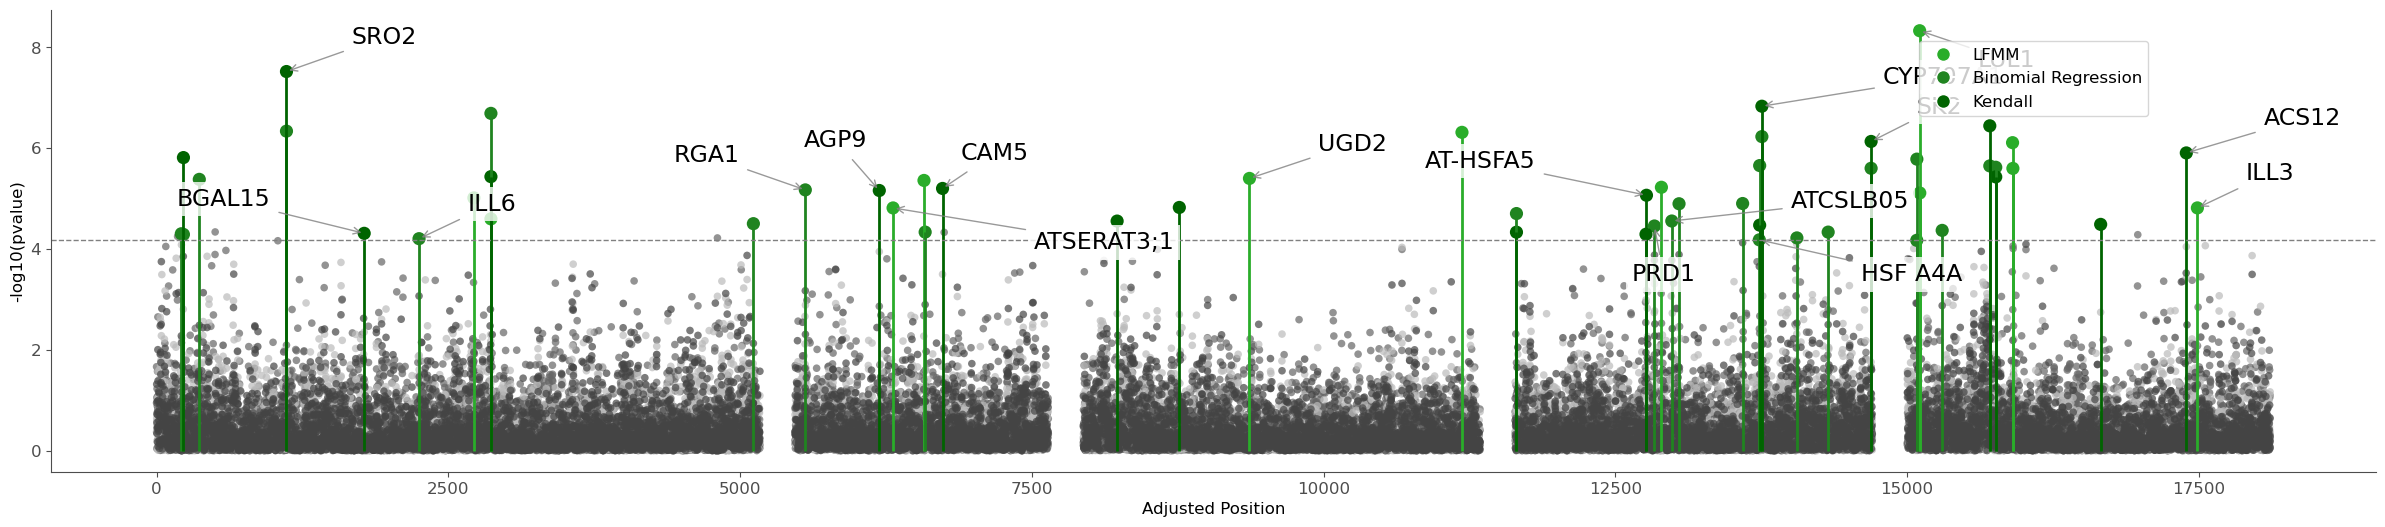

In [102]:

# Create the Manhattan plot
plt.figure(figsize=(30, 6))

# Plot the first dataset (LFMM)
for chrom in sorted(df1['chromosome'].unique()):
    subset = df1[df1['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant_df1 = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=alpha_grey_dots, 
        edgecolor='none',  # No edge color
        c=greyscale_colors[0],  # Same color as significant points
        s=s_small,  # Smaller size for non-significant points
    )
    
    # Plot significant points in alternating shades of green with bigger size
    plt.scatter(
        significant_df1['adjusted_position'],
        significant_df1['-log10(pvalue)'],
        alpha=alpha_colors, 
        edgecolor='none',  # No edge color
        c=color_mapping['lfmm'],  # Alternate green color shades
        s=90,  # Bigger size for significant points
    )
    # Add vertical lines for significant points
    plt.vlines(
        significant_df1['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant_df1['-log10(pvalue)'],
        color=color_mapping['lfmm'],  # Same color as the significant dots
        alpha=alpha_lines,
        linewidth=2,  # Adjust line width as necessary
    )

# Plot the second dataset (Binomial Regression)
for chrom in sorted(df2['chromosome'].unique()):
    subset = df2[df2['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant_df2 = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=alpha_grey_dots, 
        edgecolor='none',  # No edge color
        c=greyscale_colors[1],  # Same color as significant points
        s=s_small,  # Smaller size for non-significant points
    )
    
    # Plot significant points in purple with bigger size
    plt.scatter(
        significant_df2['adjusted_position'],
        significant_df2['-log10(pvalue)'],
        alpha=alpha_colors, 
        edgecolor='none',  # No edge color
        c=color_mapping['binom_reg'],  # Use purple for significant points
        s=90,  # Bigger size for significant points
    )

    # Add vertical lines for significant points
    plt.vlines(
        significant_df2['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant_df2['-log10(pvalue)'],
        color=color_mapping['binom_reg'],  # Same color as the significant dots
        alpha=alpha_lines,
        linewidth=2,  # Adjust line width as necessary
    )

# Plot the third dataset (Kendall)
for chrom in sorted(df3['chromosome'].unique()):
    subset = df3[df3['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant_df3 = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=alpha_grey_dots, 
        edgecolor='none',  # No edge color
        c=greyscale_colors[2],  # Same color as significant points
        s=s_small,  # Smaller size for non-significant points
    )
    
    # Plot significant points in orange with bigger size
    plt.scatter(
        significant_df3['adjusted_position'],
        significant_df3['-log10(pvalue)'],
        alpha=alpha_colors, 
        edgecolor='none',  # No edge color
        c=color_mapping['kendall'],  # Use orange for significant points
        s=90,  # Bigger size for significant points
    )

    # Add vertical lines for significant points
    plt.vlines(
        significant_df3['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant_df3['-log10(pvalue)'],
        color=color_mapping['kendall'],  # Same color as the significant dots
        alpha=alpha_lines,
        linewidth=2,  # Adjust line width as necessary
    )

# Store the annotations for later adjustment
texts = []

# Annotate genes from the 'annot' DataFrame
for i, row in annot.iterrows():
    texts.append(
        plt.text(
            row['adjusted_position'], 
            row['-log10(pvalue)'],# Adjusting to place the text above the point
            row['gene_name'],  # Gene name to annotate
            fontsize=17,  # Font size for annotation
            ha='center',  # Horizontal alignment
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)  
        )
    )

adjust_text(texts, 
            expand_points=(3, 3),  
            only_move={'text':'y+'},
            arrowprops=dict(arrowstyle='->', color='gray', lw=1, alpha=0.8))


plt.xlabel('Adjusted Position', fontsize=12)
plt.ylabel('-log10(pvalue)', fontsize=12)

plt.axhline(y=significance_line, color='grey', linestyle='--', linewidth=1)
# Create a custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='LFMM', markerfacecolor=color_mapping['lfmm'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Binomial Regression', markerfacecolor=color_mapping['binom_reg'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Kendall', markerfacecolor=color_mapping['kendall'], markersize=10),
]


plt.rc('font', family= 'sans-serif', size=fontisize, weight='normal')  # Regular font size
plt.rc('axes', titlesize=fontisize, labelsize=12)  # Title and label size for axes
plt.rc('xtick', labelsize=fontisize)  # X tick labels size
plt.rc('ytick', labelsize=fontisize)  # Y tick labels size

dark_grey = '#4D4D4D'  # Define dark grey color

# Apply to spines
plt.gca().spines['left'].set_color(dark_grey)
plt.gca().spines['bottom'].set_color(dark_grey)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(0.8, 0.95))

#plt.savefig("gea_final_gen_bh_onegeneperblock.png", dpi=400)  # Save as SVG
#plt.savefig("gea_final_gen_bh.svg", format='svg')  # Save as SVG
#plt.savefig("gea_final_gen_bh.pdf")  # Save as SVG

# Remove grid lines
plt.grid(False)


In [104]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 
import matplotlib.pyplot as plt

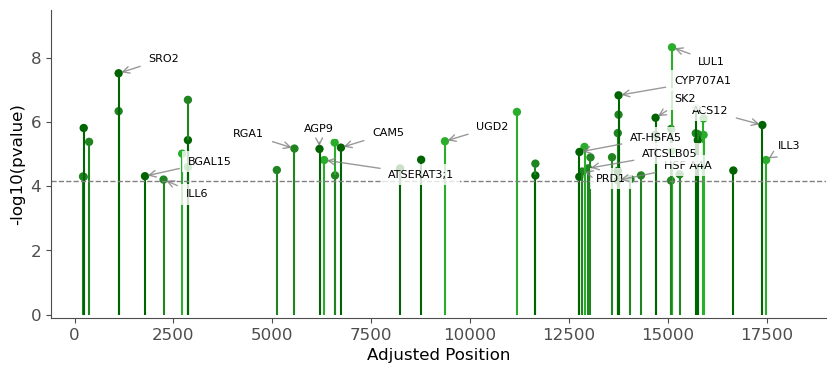

In [117]:

# Create the Manhattan plot
plt.figure(figsize=(10, 4))
# Plot the first dataset (LFMM)
for chrom in sorted(df1['chromosome'].unique()):
    subset = df1[df1['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant_df1 = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
        
    # Plot significant points in alternating shades of green with bigger size
    plt.scatter(
        significant_df1['adjusted_position'],
        significant_df1['-log10(pvalue)'],
        alpha=alpha_colors, 
        edgecolor='none',  # No edge color
        c=color_mapping['lfmm'],  # Alternate green color shades
        #s=90,  # Bigger size for significant points
    )
    # Add vertical lines for significant points
    plt.vlines(
        significant_df1['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant_df1['-log10(pvalue)'],
        color=color_mapping['lfmm'],  # Same color as the significant dots
        alpha=alpha_lines,
        #linewidth=2,  # Adjust line width as necessary
    )


# Plot the second dataset (Binomial Regression)
for chrom in sorted(df2['chromosome'].unique()):
    subset = df2[df2['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant_df2 = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    
    # Plot significant points in purple with bigger size
    plt.scatter(
        significant_df2['adjusted_position'],
        significant_df2['-log10(pvalue)'],
        alpha=alpha_colors, 
        edgecolor='none',  # No edge color
        c=color_mapping['binom_reg'],  # Use purple for significant points
        #s=90,  # Bigger size for significant points
    )

    # Add vertical lines for significant points
    plt.vlines(
        significant_df2['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant_df2['-log10(pvalue)'],
        color=color_mapping['binom_reg'],  # Same color as the significant dots
        alpha=alpha_lines,
        #linewidth=2,  # Adjust line width as necessary
    )

# Plot the third dataset (Kendall)
for chrom in sorted(df3['chromosome'].unique()):
    subset = df3[df3['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant_df3 = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot significant points in orange with bigger size
    plt.scatter(
        significant_df3['adjusted_position'],
        significant_df3['-log10(pvalue)'],
        alpha=alpha_colors, 
        edgecolor='none',  # No edge color
        c=color_mapping['kendall'],  # Use orange for significant points
        #s=90,  # Bigger size for significant points
    )

    # Add vertical lines for significant points
    plt.vlines(
        significant_df3['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant_df3['-log10(pvalue)'],
        color=color_mapping['kendall'],  # Same color as the significant dots
        alpha=alpha_lines,
        #linewidth=2,  # Adjust line width as necessary
    )

# Store the annotations for later adjustment
texts = []

# Annotate genes from the 'annot' DataFrame
for i, row in annot.iterrows():
    texts.append(
        plt.text(
            row['adjusted_position'], 
            row['-log10(pvalue)'],# Adjusting to place the text above the point
            row['gene_name'],  # Gene name to annotate
            fontsize=8,  # Font size for annotation
            ha='center',  # Horizontal alignment
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)  
        )
    )

adjust_text(texts, 
            expand_points=(3, 3),  
            only_move={'text':'y+'},
            arrowprops=dict(arrowstyle='->', color='gray', lw=1, alpha=0.8))


plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')

plt.axhline(y=significance_line, color='grey', linestyle='--', linewidth=1)
# Create a custom legend
#handles = [
#    plt.Line2D([0], [0], marker='o', color='w', label='LFMM', markerfacecolor=color_mapping['lfmm'], markersize=10),
#    plt.Line2D([0], [0], marker='o', color='w', label='Binomial Regression', markerfacecolor=color_mapping['binom_reg'], markersize=10),
#    plt.Line2D([0], [0], marker='o', color='w', label='Kendall', markerfacecolor=color_mapping['kendall'], markersize=10),
#]

dark_grey = '#4D4D4D'  # Define dark grey color

# Apply to spines
plt.gca().spines['left'].set_color(dark_grey)
plt.gca().spines['bottom'].set_color(dark_grey)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors

#plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(0.8, 0.95))

plt.ylim(-0.1, 9.5)
plt.xlim(-600, 19000)

#plt.savefig("gea_final_gen_bh.png")  # Save as SVG
#plt.savefig("gea_final_gen_bh_ANNOTATIONS.svg", format='svg')  # Save as SVG
plt.savefig("gea_final_gen_bh_ANNOTATIONS_bio18.pdf", format='pdf')  # Save as SVG

#plt.savefig("gea_final_gen_bh.pdf")  # Save as SVG
    # Define the mapping of adjusted positions to actual positions
    # Example: Use a dictionary or DataFrame with the mapping

plt.grid(False)


In [106]:
adjusted_to_actual = dict(zip(df1['adjusted_position'], df1['pos']))

In [ ]:


# Get unique adjusted positions and their corresponding actual positions
unique_adjusted_positions = sorted(adjusted_to_actual.keys())
actual_position_labels = [adjusted_to_actual[pos] for pos in unique_adjusted_positions]

# Update x-axis ticks and labels
plt.xticks(
    ticks=unique_adjusted_positions,   # Set ticks at adjusted positions
    labels=actual_position_labels,    # Replace labels with actual positions
    rotation=45,                      # Optional: Rotate labels for clarity
    ha='right'                        # Optional: Align labels to the right
)
# Remove grid lines

([<matplotlib.axis.XTick at 0x7fec6ceca340>,
  ...],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(45, 0, '45'),
  Text(46, 0, '46'),
  Text(47, 0, '47'),
 

Error in callback <function flush_figures at 0x7fec6c9a03a0> (for post_execute):


In [111]:
df1['adjusted_position'].max()

18112

In [112]:
df1['c_color'] = np.where(df3['chromosome'] % 2 == 0, '#666666', '#BBBBBB')  # Even chromosomes in blue, odd in red
greyscale_colors = ['#666666', '#BBBBBB', '#444444']
df2['c_color'] = np.where(df3['chromosome'] % 2 == 0, '#666666', '#BBBBBB')  # Even chromosomes in blue, odd in red

df3['c_color'] = np.where(df3['chromosome'] % 2 == 0, '#666666', '#BBBBBB')  # Even chromosomes in blue, odd in red


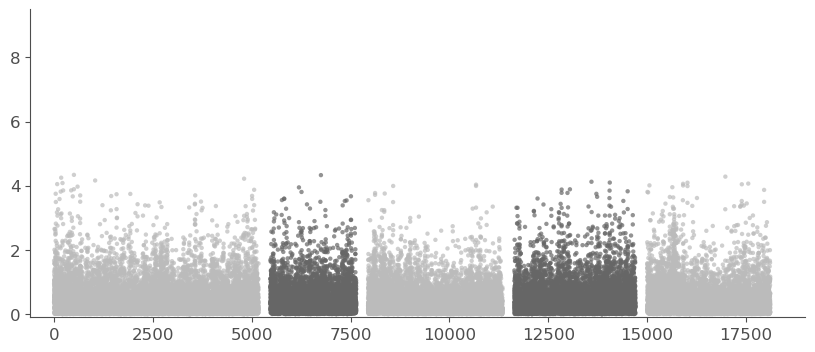

In [115]:
s_small = 10

# Create the Manhattan plot
plt.figure(figsize=(10, 4))

# Plot the first dataset (LFMM)
for chrom in sorted(df1['chromosome'].unique()):
    subset = df1[df1['chromosome'] == chrom]

    
    # Separate significant points (above threshold) and non-significant points
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=alpha_grey_dots, 
        edgecolor='none',  # No edge color
        c=non_significant['c_color'],  # Same color as significant points
        s=s_small,  # Smaller size for non-significant points
    )
    

# Plot the second dataset (Binomial Regression)
for chrom in sorted(df2['chromosome'].unique()):
    subset = df2[df2['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=alpha_grey_dots, 
        edgecolor='none',  # No edge color
        c=non_significant['c_color'],  # Same color as significant points
        s=s_small,  # Smaller size for non-significant points
    )
    

# Plot the third dataset (Kendall)
for chrom in sorted(df3['chromosome'].unique()):
    subset = df3[df3['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    non_significant = subset[subset['Bonferroni_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=alpha_grey_dots, 
        edgecolor='none',  # No edge color
        c=non_significant['c_color'],  # Same color as significant points
        s=s_small,  # Smaller size for non-significant points
    )
    
#plt.xlabel('Adjusted Position', fontsize=12)
#plt.ylabel('-log10(pvalue)', fontsize=12)


#plt.rc('font', family= 'sans-serif', size=fontisize, weight='normal')  # Regular font size
#plt.rc('axes', titlesize=fontisize, labelsize=12)  # Title and label size for axes
#plt.rc('xtick', labelsize=fontisize)  # X tick labels size
#plt.rc('ytick', labelsize=fontisize)  # Y tick labels size

dark_grey = '#4D4D4D'  # Define dark grey color

# Apply to spines
plt.gca().spines['left'].set_color(dark_grey)
plt.gca().spines['bottom'].set_color(dark_grey)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors

plt.ylim(-0.1, 9.5)
plt.xlim(-600, 19000)

#plt.savefig("gea_final_gen_bh.png")  # Save as SVG
#plt.savefig("gea_final_gen_bh_background_snps.svg", format='svg')  # Save as SVG
plt.savefig("gea_final_gen_bh_background_snps_bio18.png",  dpi=900, )  # Save as SVG

#plt.savefig("gea_final_gen_bh.pdf")  # Save as SVG

# Remove grid lines
plt.grid(False)


In [115]:
annot = annot.sort_values('adjusted_position')

In [101]:
import svgwrite
from svgpathtools import svg2paths2

# Load both SVG files
with open('gea_final_gen_bh_ANNOTATIONS.svg', 'r') as f:
    annotations_svg = f.read()

with open('gea_final_gen_bh_background_snps.svg', 'r') as f:
    background_svg = f.read()

# Create a new SVG drawing
dwg = svgwrite.Drawing("combined_plot.svg")

# Insert the background SVG content
dwg.add(svgwrite.raw.Raw(annotations_svg))

# Insert the annotations SVG content
dwg.add(svgwrite.raw.Raw(background_svg))

# Save the combined SVG
dwg.save()

ModuleNotFoundError: No module named 'svgpathtools'

In [29]:
text_list

['Text0',
 'Text1',
 'Text2',
 'Text3',
 'Text4',
 'Text5',
 'Text6',
 'Text7',
 'Text8',
 'Text9',
 'Text10',
 'Text11',
 'Text12',
 'Text13',
 'Text14',
 'Text15',
 'Text16',
 'Text17',
 'Text18',
 'Text19',
 'Text20',
 'Text21',
 'Text22',
 'Text23',
 'Text24',
 'Text25',
 'Text26',
 'Text27',
 'Text28',
 'Text29']

In [30]:
import textalloc as ta

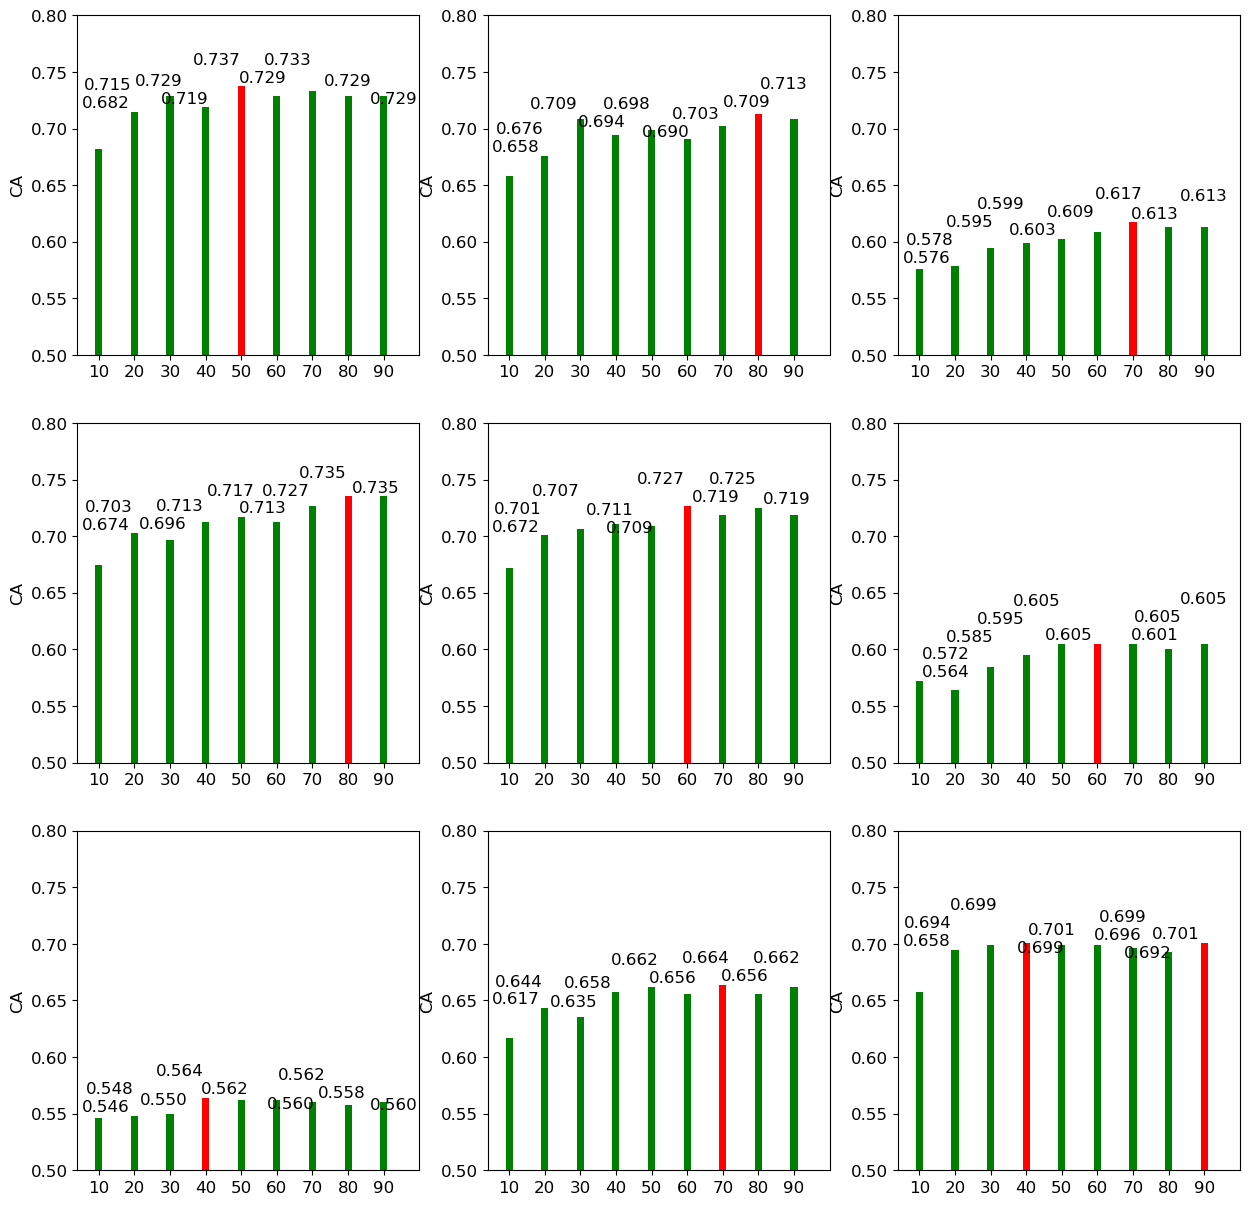

In [50]:
data = [{'rf': [[10, 0.682312925170068], [20, 0.714904143475572], [30, 0.729107400535972], [40, 0.718944547515976], [50, 0.7372706658420943], [60, 0.7291486291486291], [70, 0.7332302618016904], [80, 0.7291486291486291], [90, 0.7291486291486291]], 'besttree': 0.7372706658420943}, {'rf': [[10, 0.6576994434137291], [20, 0.6760874046588332], [30, 0.7086786229643371], [40, 0.6943929086786229], [50, 0.6984951556380127], [60, 0.6903731189445474], [70, 0.7025974025974027], [80, 0.7128014842300556], [90, 0.7086786229643373]], 'besttree': 0.7128014842300556}, {'rf': [[10, 0.5763347763347764], [20, 0.5783962069676354], [30, 0.5946402803545661], [40, 0.5988455988455988], [50, 0.6028653885796743], [60, 0.6089466089466089], [70, 0.6171098742527313], [80, 0.6130488559059988], [90, 0.6130488559059988]], 'besttree': 0.6171098742527313}, {'rf': [[10, 0.6741084312512883], [20, 0.7025767882910741], [30, 0.6964337250051535], [40, 0.7127396413110699], [50, 0.7167594310451453], [60, 0.712677798392084], [70, 0.7269635126777982], [80, 0.7351061636775922], [90, 0.7350855493712636]], 'besttree': 0.7351061636775922}, {'rf': [[10, 0.6719645433931148], [20, 0.7006184291898577], [30, 0.7066378066378066], [40, 0.7107606679035251], [50, 0.7086580086580087], [60, 0.7269841269841271], [70, 0.718841475984333], [80, 0.7249433106575964], [90, 0.7188827045969903]], 'besttree': 0.7269841269841271}, {'rf': [[10, 0.5722119150690579], [20, 0.5641723356009071], [30, 0.5845186559472274], [40, 0.5947227375798805], [50, 0.6048649762935477], [60, 0.6049062049062048], [70, 0.6048443619872191], [80, 0.6007833436404865], [90, 0.6048855905998763]], 'besttree': 0.6049062049062048}, {'rf': [[10, 0.54582560296846], [20, 0.5478664192949907], [30, 0.5499278499278499], [40, 0.564172335600907], [50, 0.5621109049680477], [60, 0.5621109049680478], [70, 0.5600700886415172], [80, 0.5580705009276438], [90, 0.5600907029478458]], 'besttree': 0.564172335600907}, {'rf': [[10, 0.6171304885590599], [20, 0.6435992578849722], [30, 0.6354566068851784], [40, 0.6577819006390435], [50, 0.6618429189857762], [60, 0.6557410843125129], [70, 0.6638425066996495], [80, 0.65578231292517], [90, 0.6618841475984334]], 'besttree': 0.6638425066996495}, {'rf': [[10, 0.6578643578643579], [20, 0.6944135229849515], [30, 0.69853638425067], [40, 0.7005565862708719], [50, 0.6985569985569986], [60, 0.6985363842506699], [70, 0.6964955679241392], [80, 0.6923933209647496], [90, 0.7005565862708719]], 'besttree': 0.7005565862708719}]

fig = plt.figure(facecolor="w",figsize=(15,15))
for i,result in enumerate(data):
# Let's plot the bars
    ax=fig.add_subplot(3,3,i+1)
    x = [item[0] for item in result['rf']]
    y = [item[1] for item in result['rf']]
    ax.axis(ymin=0.5,ymax=0.8,xmin=4,xmax=100)
    bars=ax.bar(x,y,color='green',tick_label=x,width=2)
# And add the labels, while changing the colour of some of the bars
    texts=[]
    for j,rect in enumerate(bars):
        left = rect.get_x()+1
        top = rect.get_y()+rect.get_height()
        texts.append(ax.text(left,top,'%.3f'%y[j], ha='center', va='bottom'))
        if y[j] == result['besttree']:
            rect.set_facecolor('red')
            
# Now adjust the text. We don't want to move in the x direction and we want the labels to vertically aligned with the bars.
# I also noticed that having a weaker force to repel texts from ech other makes the figure nicer.
    ax.set_ylabel('CA')
    adjust_text(texts, add_objects=bars,
                only_move={'text': 'y'} , ax=ax);

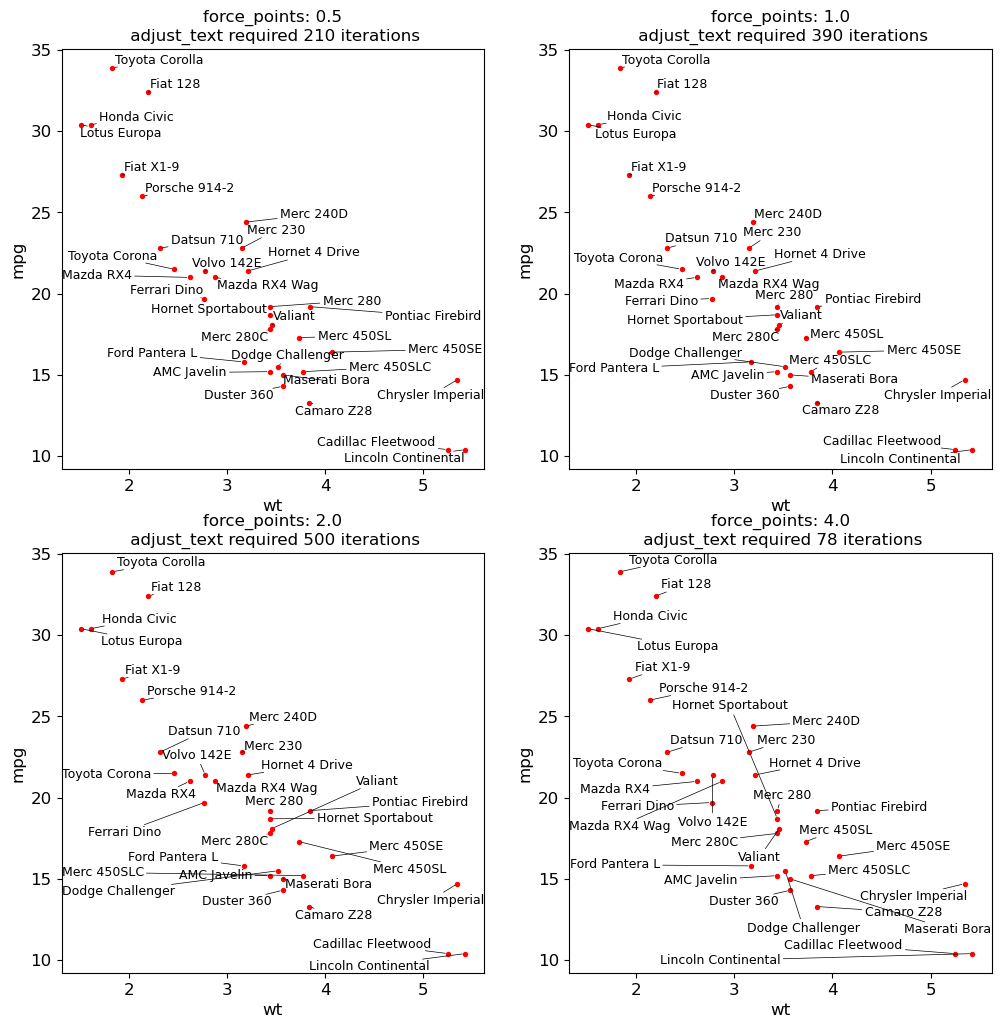

In [179]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
                                                                                                                                
mtcars = pd.read_csv(
    "https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv"
)
                                                                                                                                
def plot_mtcars(adjust=False, force_points=1, *args, **kwargs):
    # plt.figure(figsize=(9, 6))
    plt.scatter(mtcars["wt"], mtcars["mpg"], s=15, c="r", edgecolors=(1, 1, 1, 0))
    texts = []
    for x, y, s in zip(mtcars["wt"], mtcars["mpg"], mtcars["model"]):
        texts.append(plt.text(x, y, s, size=9))
    plt.xlabel("wt")
    plt.ylabel("mpg")
    if adjust:
        plt.title(
            "force_points: %.1f\n adjust_text required %s iterations"
            % (
                force_points,
                adjust_text(
                    texts,
                    force_points=force_points,
                    arrowprops=dict(arrowstyle="-", color="k", lw=0.5),
                    **kwargs,
                ),
            )
        )
    else:
        plt.title("Original")
    return plt
                                                                                                                                
fig = plt.figure(figsize=(12, 12))
                                                                                                                                
force_points = [0.5, 1, 2, 4]
for index, k in enumerate(force_points):
    fig.add_subplot(2, 2, index + 1)
    plot_mtcars(adjust=True, force_points=k)

In [177]:

def repel_labels(ax, texts, tolerance=0.05):
    """
    Repel overlapping annotations vertically.
    :param ax: matplotlib axes
    :param texts: list of matplotlib.text.Text instances
    :param tolerance: how much text can overlap before repelling
    """
    for i, text1 in enumerate(texts):
        pos1 = text1.get_position()
        for j, text2 in enumerate(texts):
            if i == j:
                continue
            pos2 = text2.get_position()

            # Check if the text overlaps with another text
            if np.abs(pos1[1] - pos2[1]) < tolerance and np.abs(pos1[0] - pos2[0]) < tolerance:
                # Adjust text2 upwards to avoid overlap
                text2.set_position((pos2[0], pos2[1] + tolerance))


In [ ]:
# Example array of adjusted positions
adjusted_positions_arrows = np.array([  697,  6735, 13756, 13961, 14046, 14692])
#colors_arrow = ['#6DAEDB', '#1D70A2','#6DAEDB','#6DAEDB']
# Example y-values (you can use actual y-values from your data or set it manually)
y_values = np.array([4, 3, 2, 2,2,2])  # Replace with actual -log10(pvalue) at these positions

# Plot your existing data (assumed to be already plotted here)
# Add arrows for each of the positions
for i, pos in enumerate(adjusted_positions_arrows):
    plt.annotate(
        '',  # No text label, just the arrow
        xy=(pos, y_values[i]),  # Position of the arrow tip (x, y)
        xytext=(pos, y_values[i] + 0.5),  # Start of the arrow (above the point)
        arrowprops=dict(color='black', arrowstyle='->', lw=3),  # Use color instead of facecolor
    )


In [69]:
subset

,Z_pVal,pos,chrom,chrom_pos,chromosome,position,-log10(pvalue),Bonferroni_corrected_pval
0,0.862165,0,1,1_0,1,0,0.064410,1.0
1,0.065352,1,1,1_1,1,1,1.184743,1.0
2,0.504721,10,1,1_10,1,10,0.296949,1.0
3,0.589655,100,1,1_100,1,100,0.229402,1.0
4,0.488026,1000,1,1_1000,1,1000,0.311557,1.0
...,...,...,...,...,...,...,...,...
5108,0.705376,995,1,1_995,1,995,0.151580,1.0
5109,0.508665,996,1,1_996,1,996,0.293568,1.0
5110,0.401255,997,1,1_997,1,997,0.396580,1.0
5111,0.617283,998,1,1_998,1,998,0.209516,1.0


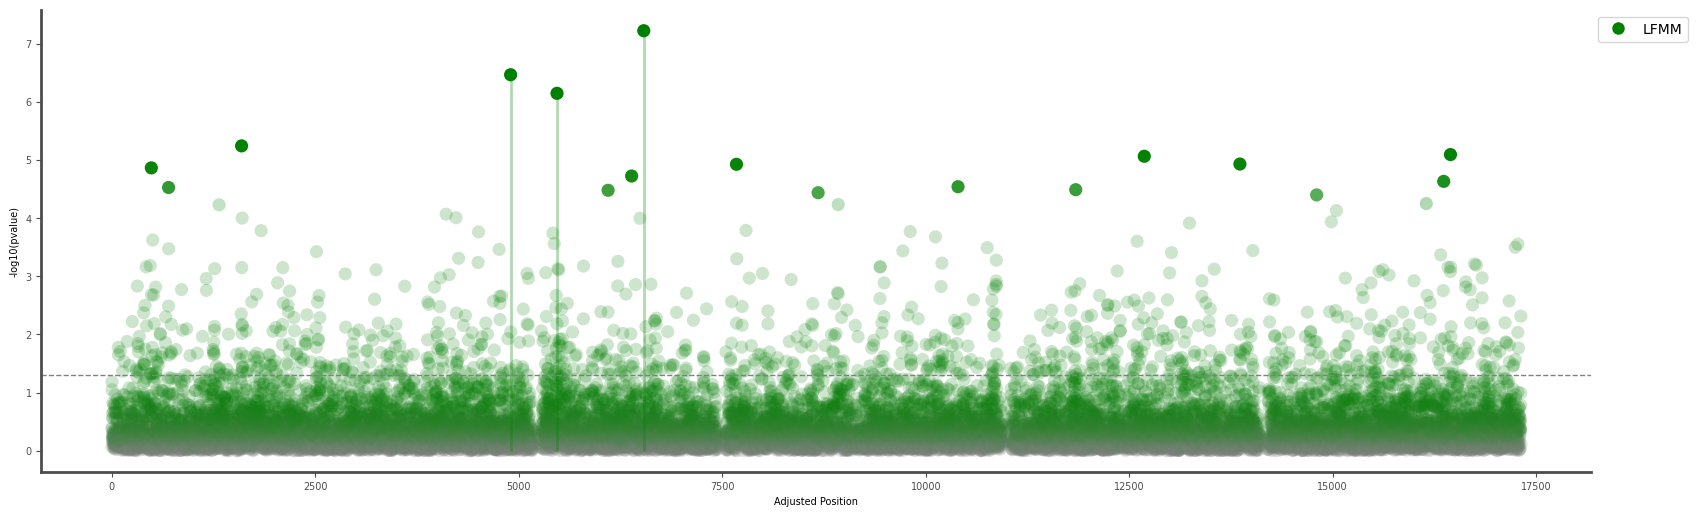

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import matplotlib.colors as mcolors

# Load the first GWAS data
wza_lfmm = pd.read_csv('../wza/wza_results_lfmm_bio1_poly7.csv')

# Extract chromosome and position from the gene column
wza_lfmm['chrom'] = wza_lfmm['gene'].str.split('_').str[0].astype(int)
wza_lfmm['pos'] = wza_lfmm['gene'].str.split('_').str[1].astype(int)

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df1 = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df1['chromosome'] = df1['chrom']
df1['position'] = df1['pos']
df1['-log10(pvalue)'] = -np.log10(df1['Z_pVal'])

# Apply Bonferroni correction
df1['Bonferroni_corrected_pval'] = multipletests(df1['Z_pVal'], method='bonferroni')[1]

# Calculate chromosome offsets to prevent overlap for all datasets
chromosome_offsets = {}
offset = 0
for chrom in sorted(df1['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df1[df1['chromosome'] == chrom]['position'].max()
    offset += max_position + 100  # Add buffer to prevent overlap

# Apply offsets to the position
df1['adjusted_position'] = df1.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Define colors
significant_color = 'green'  # Color for significant points
non_significant_color = 'grey'

# Create a reversed colormap (green to grey)
cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", [significant_color, non_significant_color])

# Normalize the Z_pVal (raw p-values) for color mapping
norm = plt.Normalize(0, 1)  # Normalizing p-values from 0 to 1 for the gradient

# Plotting
plt.figure(figsize=(20, 6))

# Set an exponent for the alpha decay (adjust this value to control decay rate)
exponent = 2  # Higher values will make the decay slower

# Plot the first dataset (LFMM)
for chrom in sorted(df1['chromosome'].unique()):
    subset = df1[df1['chromosome'] == chrom]

    # Normalize raw p-values to range [0, 1] for color mapping
    p_values = subset['Z_pVal']
    normed_p_values = (p_values - p_values.min()) / (p_values.max() - p_values.min())

    # Get color values based on normalized p-values
    colors = cmap(norm(normed_p_values))

    # Set alpha based on Bonferroni corrected p-values with a slower decay
    alpha_values = 0.2 + (1 - 0.2) * (1 - (subset['Bonferroni_corrected_pval'].clip(upper=1) ** exponent))

    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        c=colors,  # Use the colors from the colormap
        alpha=alpha_values,  # Set alpha gradient
        edgecolor='none',  # No edge color
        s=90  # Size for points
    )

    # Add vertical lines for significant points
    significant = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    plt.vlines(
        significant['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant['-log10(pvalue)'],
        color=significant_color,  # Same color as the significant dots
        alpha=0.3,
        linewidth=2  # Adjust line width as necessary
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')

plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--', linewidth=1)

# Create a custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='LFMM', markerfacecolor=significant_color, markersize=10),
]

# Set the linewidth for the spines
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Hide the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set font properties
plt.rc('font', family='sans-serif', size=10, weight='normal')
plt.rc('axes', titlesize=8, labelsize=7)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

# Set colors to dark grey
dark_grey = '#4D4D4D'

# Apply to spines
plt.gca().spines['left'].set_color(dark_grey)
plt.gca().spines['bottom'].set_color(dark_grey)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1))

# Remove grid lines
plt.grid(False)

plt.show()


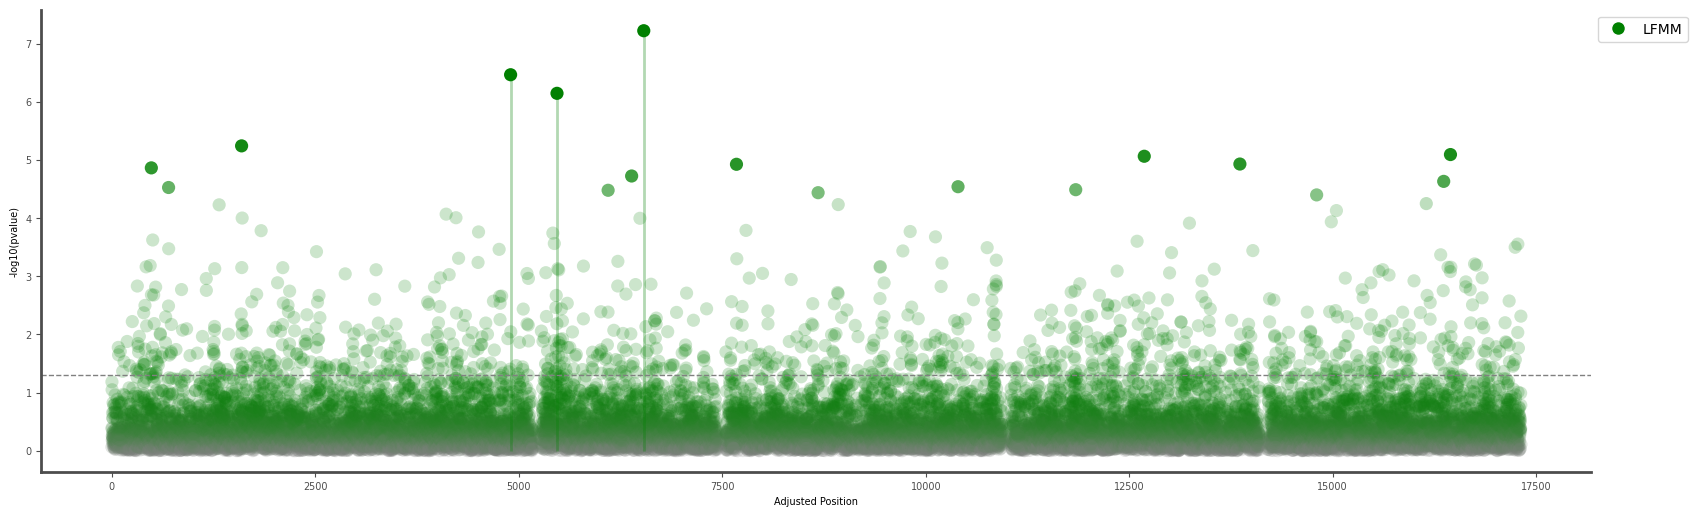

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import matplotlib.colors as mcolors

# Load the first GWAS data
wza_lfmm = pd.read_csv('../wza/wza_results_lfmm_bio1_poly7.csv')

# Extract chromosome and position from the gene column
wza_lfmm['chrom'] = wza_lfmm['gene'].str.split('_').str[0].astype(int)
wza_lfmm['pos'] = wza_lfmm['gene'].str.split('_').str[1].astype(int)

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df1 = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df1['chromosome'] = df1['chrom']
df1['position'] = df1['pos']
df1['-log10(pvalue)'] = -np.log10(df1['Z_pVal'])

# Apply Bonferroni correction
df1['Bonferroni_corrected_pval'] = multipletests(df1['Z_pVal'], method='bonferroni')[1]

# Calculate chromosome offsets to prevent overlap for all datasets
chromosome_offsets = {}
offset = 0
for chrom in sorted(df1['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df1[df1['chromosome'] == chrom]['position'].max()
    offset += max_position + 100  # Add buffer to prevent overlap

# Apply offsets to the position
df1['adjusted_position'] = df1.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Define colors
significant_color = 'green'  # Color for significant points
non_significant_color = 'grey'

# Create a reversed colormap (green to grey)
cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", [significant_color, non_significant_color])

# Normalize the Z_pVal (raw p-values) for color mapping
norm = plt.Normalize(0, 1)  # Normalizing p-values from 0 to 1 for the gradient

# Plotting
plt.figure(figsize=(20, 6))

# Plot the first dataset (LFMM)
for chrom in sorted(df1['chromosome'].unique()):
    subset = df1[df1['chromosome'] == chrom]

    # Normalize raw p-values to range [0, 1] for color mapping
    p_values = subset['Z_pVal']
    normed_p_values = (p_values - p_values.min()) / (p_values.max() - p_values.min())

    # Get color values based on normalized p-values
    colors = cmap(norm(normed_p_values))

    # Set alpha based on Bonferroni corrected p-values (higher p-value = more transparent)
    # Scale alpha to range [0.2, 1]
    alpha_values = 0.2 + (1 - 0.2) * (1 - subset['Bonferroni_corrected_pval'].clip(upper=1))  # Clip to [0,1]

    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        c=colors,  # Use the colors from the colormap
        alpha=alpha_values,  # Set alpha gradient
        edgecolor='none',  # No edge color
        s=90  # Size for points
    )

    # Add vertical lines for significant points
    significant = subset[subset['Bonferroni_corrected_pval'] < 0.05]
    plt.vlines(
        significant['adjusted_position'],
        ymin=0,  # Start from y=0
        ymax=significant['-log10(pvalue)'],
        color=significant_color,  # Same color as the significant dots
        alpha=0.3,
        linewidth=2  # Adjust line width as necessary
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')

plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--', linewidth=1)

# Create a custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='LFMM', markerfacecolor=significant_color, markersize=10),
]

# Set the linewidth for the spines
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Hide the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set font properties
plt.rc('font', family='sans-serif', size=10, weight='normal')
plt.rc('axes', titlesize=8, labelsize=7)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

# Set colors to dark grey
dark_grey = '#4D4D4D'

# Apply to spines
plt.gca().spines['left'].set_color(dark_grey)
plt.gca().spines['bottom'].set_color(dark_grey)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1))

# Remove grid lines
plt.grid(False)

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

# Load the first GWAS data
wza_lfmm = pd.read_csv('../wza/wza_results_lfmm_bio1_poly7.csv')

# Extract chromosome and position from the gene column
wza_lfmm['chrom'] = wza_lfmm['gene'].str.split('_').str[0].astype(int)
wza_lfmm['pos'] = wza_lfmm['gene'].str.split('_').str[1].astype(int)

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df1 = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df1['chromosome'] = df1['chrom']
df1['position'] = df1['pos']
df1['-log10(pvalue)'] = -np.log10(df1['Z_pVal'])

df1_threshold_value = 0.05 / len(df1)
df1_threshold_value = -np.log10(df1_threshold_value)

# Apply Benjamini-Hochberg correction
# Load the second GWAS data
binomial_reg = pd.read_csv('../wza/wza_binomial_regression_bio1_poly7.csv')

# Extract chromosome and position from the gene column
binomial_reg['chrom'] = binomial_reg['gene'].str.split('_').str[0].astype(int)
binomial_reg['pos'] = binomial_reg['gene'].str.split('_').str[1].astype(int)

# Create chrom_pos in binomial_reg by combining 'chrom' and 'pos'
binomial_reg['chrom_pos'] = binomial_reg['chrom'].astype(str) + '_' + binomial_reg['pos'].astype(str)

# Copy the relevant columns for plotting
df2 = binomial_reg[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df2['chromosome'] = df2['chrom']
df2['position'] = df2['pos']
df2['-log10(pvalue)'] = -np.log10(df2['Z_pVal'])

# Apply Benjamini-Hochberg correction

# Load the third GWAS data
wza_kendall = pd.read_csv('../wza/wza_kendalltau_results_bio1_poly7.csv')

# Extract chromosome and position from the gene column
wza_kendall['chrom'] = wza_kendall['gene'].str.split('_').str[0].astype(int)
wza_kendall['pos'] = wza_kendall['gene'].str.split('_').str[1].astype(int)

# Create chrom_pos in wza_kendall by combining 'chrom' and 'pos'
wza_kendall['chrom_pos'] = wza_kendall['chrom'].astype(str) + '_' + wza_kendall['pos'].astype(str)

# Copy the relevant columns for plotting
df3 = wza_kendall[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df3['chromosome'] = df3['chrom']
df3['position'] = df3['pos']
df3['-log10(pvalue)'] = -np.log10(df3['Z_pVal'])

# Apply Benjamini-Hochberg correction

# Calculate chromosome offsets to prevent overlap for all datasets
chromosome_offsets = {}
offset = 0
for chrom in sorted(pd.concat([df1['chromosome'], df2['chromosome'], df3['chromosome']]).unique()):
    chromosome_offsets[chrom] = offset
    max_position = max(df1[df1['chromosome'] == chrom]['position'].max(), 
                       df2[df2['chromosome'] == chrom]['position'].max(),
                       df3[df3['chromosome'] == chrom]['position'].max())
    offset += max_position + 100  # Add buffer to prevent overlap

# Apply offsets to the position for all datasets
df1['adjusted_position'] = df1.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
df2['adjusted_position'] = df2.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
df3['adjusted_position'] = df3.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot the first dataset (LFMM)
for chrom in sorted(df1['chromosome'].unique()):
    subset = df1[df1['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant = subset[subset['BH_corrected_pval'] < 0.05]
    non_significant = subset[subset['BH_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=0.3, 
        c=green_colors[chrom % len(green_colors)],  # Same color as significant points
        s=20,  # Smaller size for non-significant points
    )
    
    # Plot significant points in alternating shades of green with bigger size
    plt.scatter(
        significant['adjusted_position'],
        significant['-log10(pvalue)'],
        alpha=0.7, 
        c=green_colors[chrom % len(green_colors)],  # Alternate green color shades
        s=90,  # Bigger size for significant points
    )

# Plot the second dataset (Binomial Regression)
for chrom in sorted(df2['chromosome'].unique()):
    subset = df2[df2['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant = subset[subset['BH_corrected_pval'] < 0.05]
    non_significant = subset[subset['BH_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=0.3, 
        c='purple',  # Same color as significant points
        s=20,  # Smaller size for non-significant points
    )
    
    # Plot significant points in purple with bigger size
    plt.scatter(
        significant['adjusted_position'],
        significant['-log10(pvalue)'],
        alpha=0.7, 
        c='purple',  # Use purple for significant points
        s=90,  # Bigger size for significant points
    )

# Plot the third dataset (Kendall)
for chrom in sorted(df3['chromosome'].unique()):
    subset = df3[df3['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant = subset[subset['BH_corrected_pval'] < 0.05]
    non_significant = subset[subset['BH_corrected_pval'] >= 0.05]
    
    # Plot non-significant points in the same color as significant ones, smaller and transparent
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=0.3, 
        c='orange',  # Same color as significant points
        s=20,  # Smaller size for non-significant points
    )
    
    # Plot significant points in orange with bigger size
    plt.scatter(
        significant['adjusted_position'],
        significant['-log10(pvalue)'],
        alpha=0.7, 
        c='orange',  # Use orange for significant points
        s=90,  # Bigger size for significant points
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot with Three GWAS')

# Create a custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='LFMM', markerfacecolor=green_colors[0], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Binomial Regression', markerfacecolor='purple', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Kendall', markerfacecolor='orange', markersize=10),
]

plt.legend(handles=handles, title='Significance Colors')

# Remove grid lines
plt.grid(False)


In [19]:
binomial_reg = pd.read_csv('../wza/wza_binomial_regression_bio1_poly7.csv')


In [22]:
binomial_reg['chrom'] = binomial_reg['gene'].str.split('_').str[0].astype(int)
binomial_reg['pos'] = binomial_reg['gene'].str.split('_').str[1].astype(int)

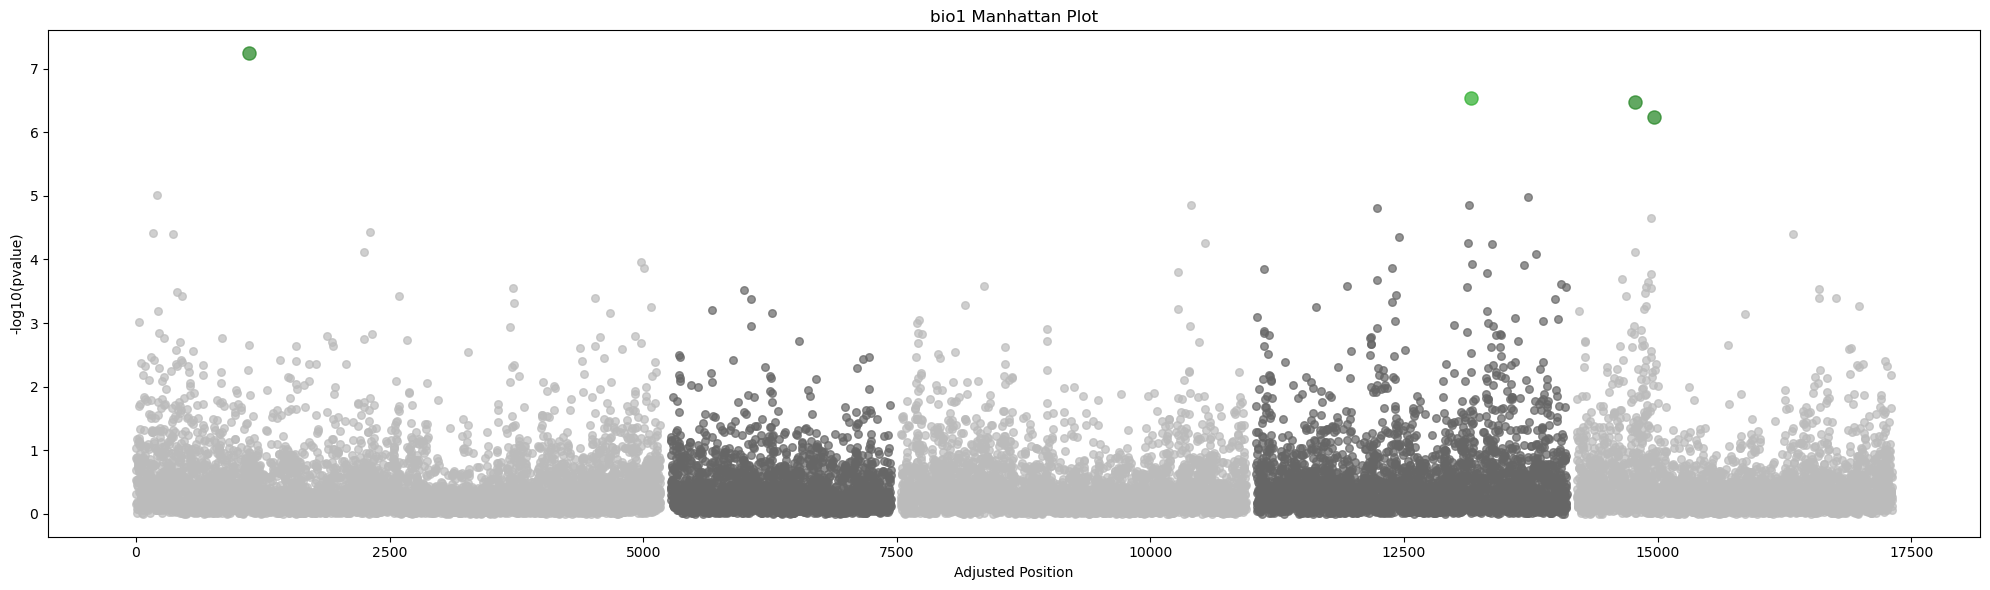

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
binomial_reg['chrom_pos'] = binomial_reg['chrom'].astype(str) + '_' + binomial_reg['pos'].astype(str)

# Copy the relevant columns for plotting
df = binomial_reg[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define grey tones for each chromosome (alternating dark and light greys)
greyscale_colors = ['#666666', '#BBBBBB', '#666666', '#BBBBBB', '#666666', '#BBBBBB']

# Define green tones for significant points (alternating dark and light greens)
green_colors = ['#2aad2a', '#208420'] # '#006400', '#32CD32', '#006400', '#32CD32']  # Dark and light greens

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 100  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant = subset[subset['-log10(pvalue)'] >= threshold]
    non_significant = subset[subset['-log10(pvalue)'] < threshold]
    
    # Plot non-significant points in greyscale
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=0.7, 
        c=greyscale_colors[chrom % len(greyscale_colors)],  # Apply greyscale color shades
        s=30,  # Default size for non-significant points
        label=f'Chr {chrom}'
    )
    
    # Plot significant points in alternating shades of green with bigger size
    plt.scatter(
        significant['adjusted_position'],
        significant['-log10(pvalue)'],
        alpha=0.7, 
        c=green_colors[chrom % len(green_colors)],  # Alternate green color shades
        s=90,  # Bigger size for significant points
        label=f'Significant Chr {chrom}'
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')

# Remove grid lines
plt.grid(False)

# Tight layout for better spacing
plt.tight_layout()
#plt.savefig("manhattan_plot_lfmm_zwa.svg", format="svg")
# Show the plot
plt.show()


In [24]:
## all samples wza on kendalltau
wza_kendall = pd.read_csv('../wza/wza_kendalltau_results_bio1_poly7.csv')

In [28]:
wza_kendall

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal,chrom,pos
0,1_0,198,0,-5.382798,1.0,0.798578,1,0
1,1_1,3,0,-1.266673,1.0,0.806488,1,1
2,1_10,22,0,-1.211412,1.0,0.673413,1,10
3,1_100,53,0,3.029274,1.0,0.178330,1,100
4,1_1000,9,0,2.030071,1.0,0.103565,1,1000
...,...,...,...,...,...,...,...,...
16651,5_995,39,0,-4.429697,1.0,0.915933,5,995
16652,5_996,3,0,-0.225149,1.0,0.543046,5,996
16653,5_997,27,0,-2.670487,1.0,0.834929,5,997
16654,5_998,7,0,-2.067785,1.0,0.892356,5,998


In [26]:
wza_kendall['chrom'] = wza_kendall['gene'].str.split('_').str[0].astype(int)
wza_kendall['pos'] = wza_kendall['gene'].str.split('_').str[1].astype(int)

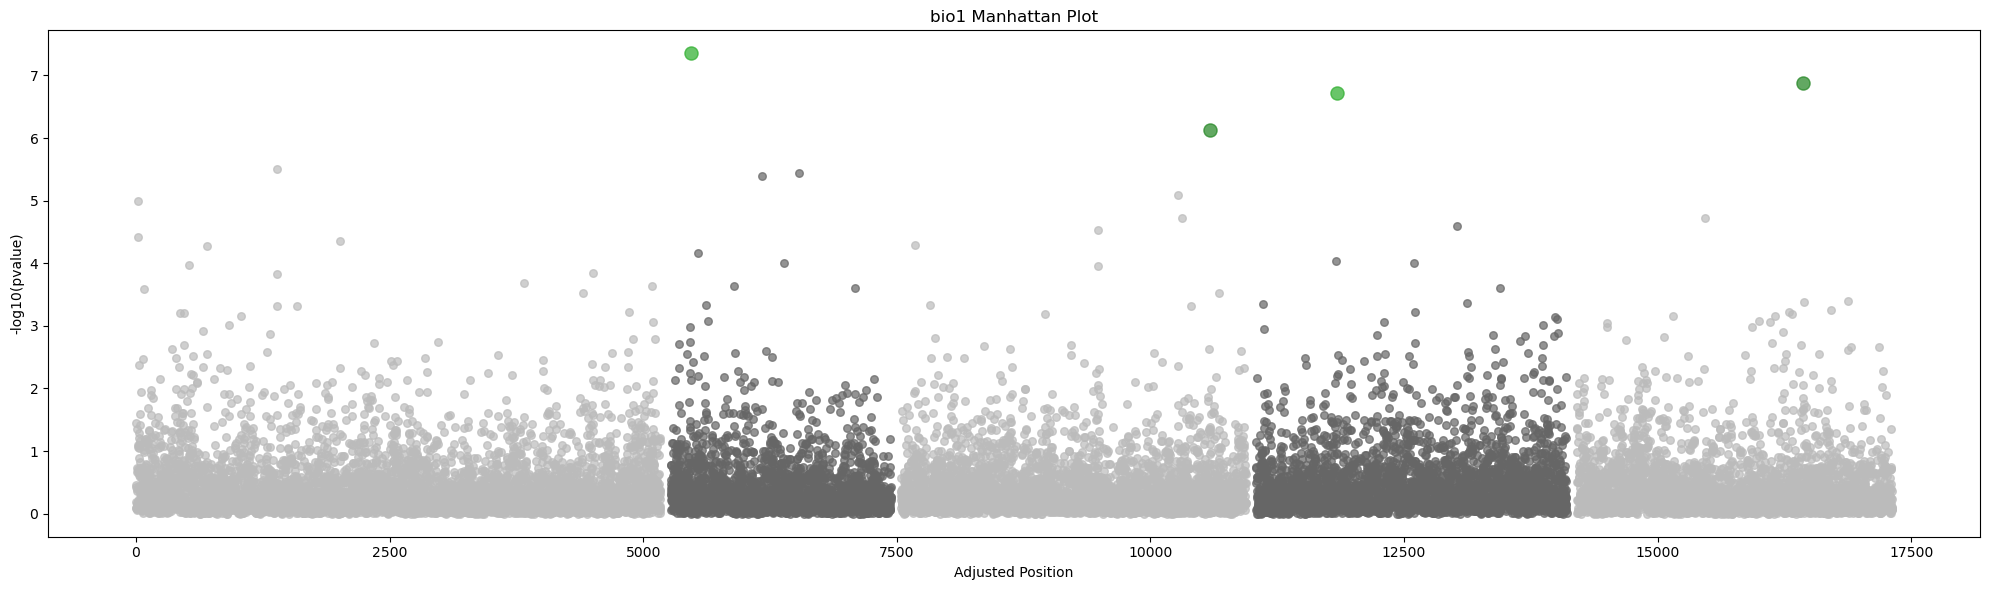

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Significance threshold
threshold_value = 0.05 / len(wza_kendall)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_kendall['chrom_pos'] = wza_kendall['chrom'].astype(str) + '_' + wza_kendall['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_kendall[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define grey tones for each chromosome (alternating dark and light greys)
greyscale_colors = ['#666666', '#BBBBBB', '#666666', '#BBBBBB', '#666666', '#BBBBBB']

# Define green tones for significant points (alternating dark and light greens)
green_colors = ['#2aad2a', '#208420'] # '#006400', '#32CD32', '#006400', '#32CD32']  # Dark and light greens

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 100  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    
    # Separate significant points (above threshold) and non-significant points
    significant = subset[subset['-log10(pvalue)'] >= threshold]
    non_significant = subset[subset['-log10(pvalue)'] < threshold]
    
    # Plot non-significant points in greyscale
    plt.scatter(
        non_significant['adjusted_position'],
        non_significant['-log10(pvalue)'],
        alpha=0.7, 
        c=greyscale_colors[chrom % len(greyscale_colors)],  # Apply greyscale color shades
        s=30,  # Default size for non-significant points
        label=f'Chr {chrom}'
    )
    
    # Plot significant points in alternating shades of green with bigger size
    plt.scatter(
        significant['adjusted_position'],
        significant['-log10(pvalue)'],
        alpha=0.7, 
        c=green_colors[chrom % len(green_colors)],  # Alternate green color shades
        s=90,  # Bigger size for significant points
        label=f'Significant Chr {chrom}'
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')

# Remove grid lines
plt.grid(False)

# Tight layout for better spacing
plt.tight_layout()
#plt.savefig("manhattan_plot_lfmm_zwa.svg", format="svg")
# Show the plot
plt.show()


In [ ]:
annot = pd.read_csv('../signficant_intersection/genes_info_bonferronicor_tair10.csv')

/tmp/ipykernel_4062620/1497640755.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


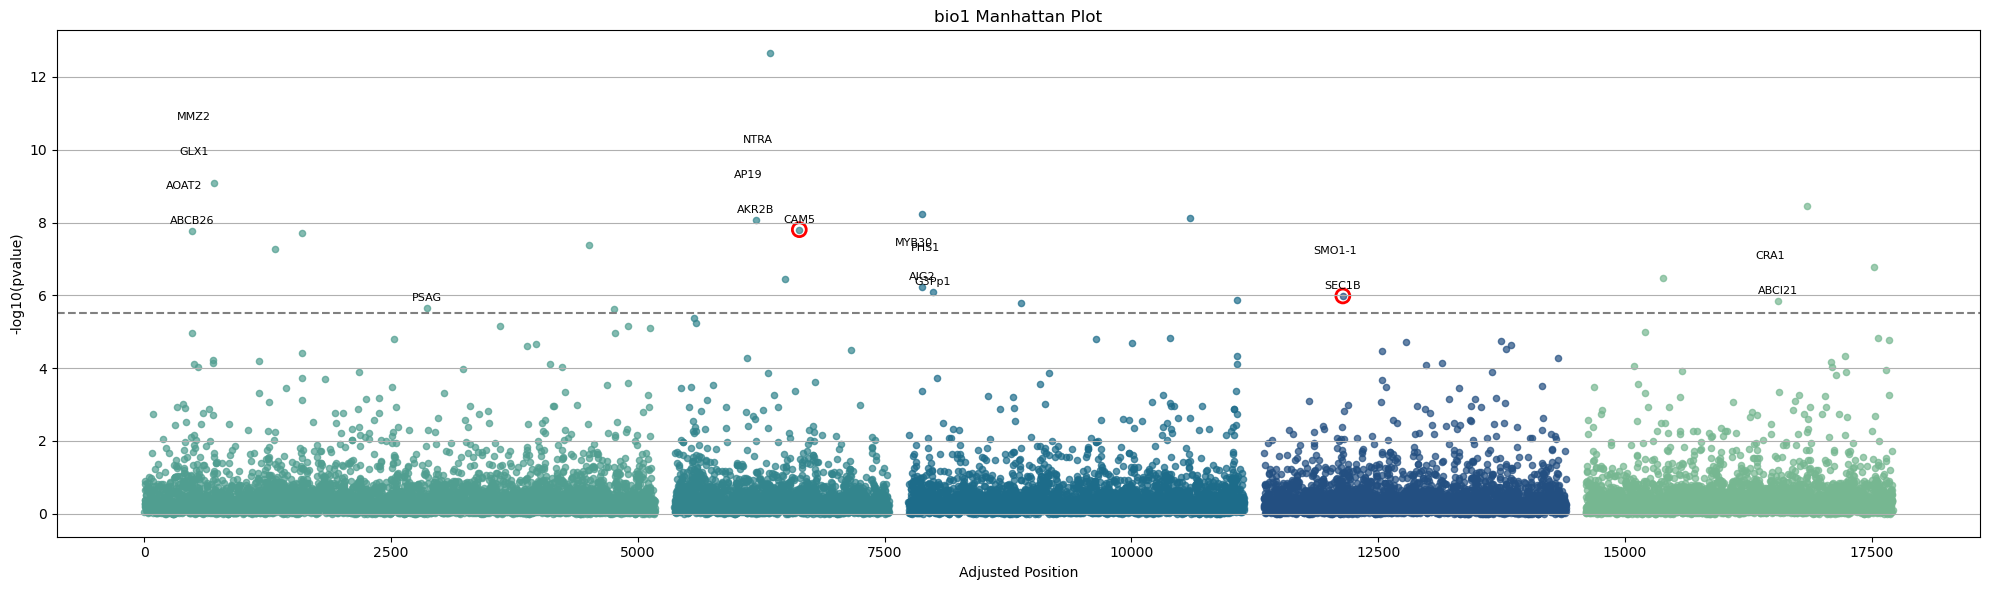

In [40]:
# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define colors for each chromosome
colors = sns.color_palette("crest", n_colors=5)

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7, 
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
        s=20
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')
plt.grid(axis='y')

# Add a threshold line for significance
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Identify significant blocks in wza_lfmm
significant_blocks = df[df['-log10(pvalue)'] >= threshold]

# Merge significant blocks with the annotation dataframe based on chrom_pos and block
annotated_blocks = significant_blocks.merge(annot, left_on='chrom_pos', right_on='block', how='inner')

# Annotate the significant points with 'gene_name' and space annotations vertically
# Annotate the significant points with 'gene_name' and space annotations both horizontally and vertically
for chrom_pos, group in annotated_blocks.groupby('block'):
    # Sort the group by gene_name to ensure consistent ordering
    group = group.sort_values(by='gene_name')
    
    # Set initial offsets for annotations
    vertical_offset = 0  
    horizontal_offset = 0
    previous_position = None  # Track the previous annotation position
    
    for i, row in group.iterrows():
        current_position = row['adjusted_position']
        
        # Adjust vertical and horizontal offsets if positions are too close
        if previous_position is not None and abs(current_position - previous_position) < 50:
            vertical_offset += 25  # Increase vertical offset for close annotations
            horizontal_offset = (-80 if horizontal_offset == 0 else 20)  # Alternate horizontal offset left/right
        else:
            vertical_offset = 0  # Reset vertical offset if there's enough distance
            horizontal_offset = 0  # Reset horizontal offset
        
        # Annotate the plot with gene name, applying both vertical and horizontal adjustments
        plt.annotate(
            row['gene_name'], 
            (row['adjusted_position'] + horizontal_offset, row['-log10(pvalue)']),
            textcoords="offset points",  # Specify the offset point for the text
            xytext=(0, 5 + vertical_offset),  # Increment vertical offset for each annotation
            ha='center',    # Align horizontally to center
            fontsize=8,
            color='black'
        )
        
        # Update previous position for the next comparison
        previous_position = current_position

# Highlight specific genes if needed
genes = ['2_1265', '4_801']  # List of specific genes to highlight
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',
            linewidth=2,
            facecolor='none',
            s=100,
            label=f'Gene {gene}'
        )

plt.tight_layout()
plt.show()


In [ ]:
2_970	AT2G22540	SVP	Encodes a nuclear protein that acts as a floral repressor and that functions within the thermosensory pathway. SVP represses FT expression via direct binding to the vCArG III motif in the FT promoter.
2_970	AT2G22630	AGL17	Encodes a MADs domain containing protein involved in promoting flowering. Loss of function mutations show delayed flowering in long days and reduced levels of LFY and AP1 expression.
2_970	AT2G22570	NIC 1.00	encodes a nicotinamidase that converts nicotinamide into nicotinic acid. As such the encoded enzyme is involved in the pyridine nucleotide salvage pathway which may be connected to the de novo NAD biosynthesis through the ABA signaling pathway.

In [42]:
annot = pd.read_csv('../signficant_intersection/df_lfmm_wza_block_gene_info_ncbi.csv')

/tmp/ipykernel_4062620/985357838.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


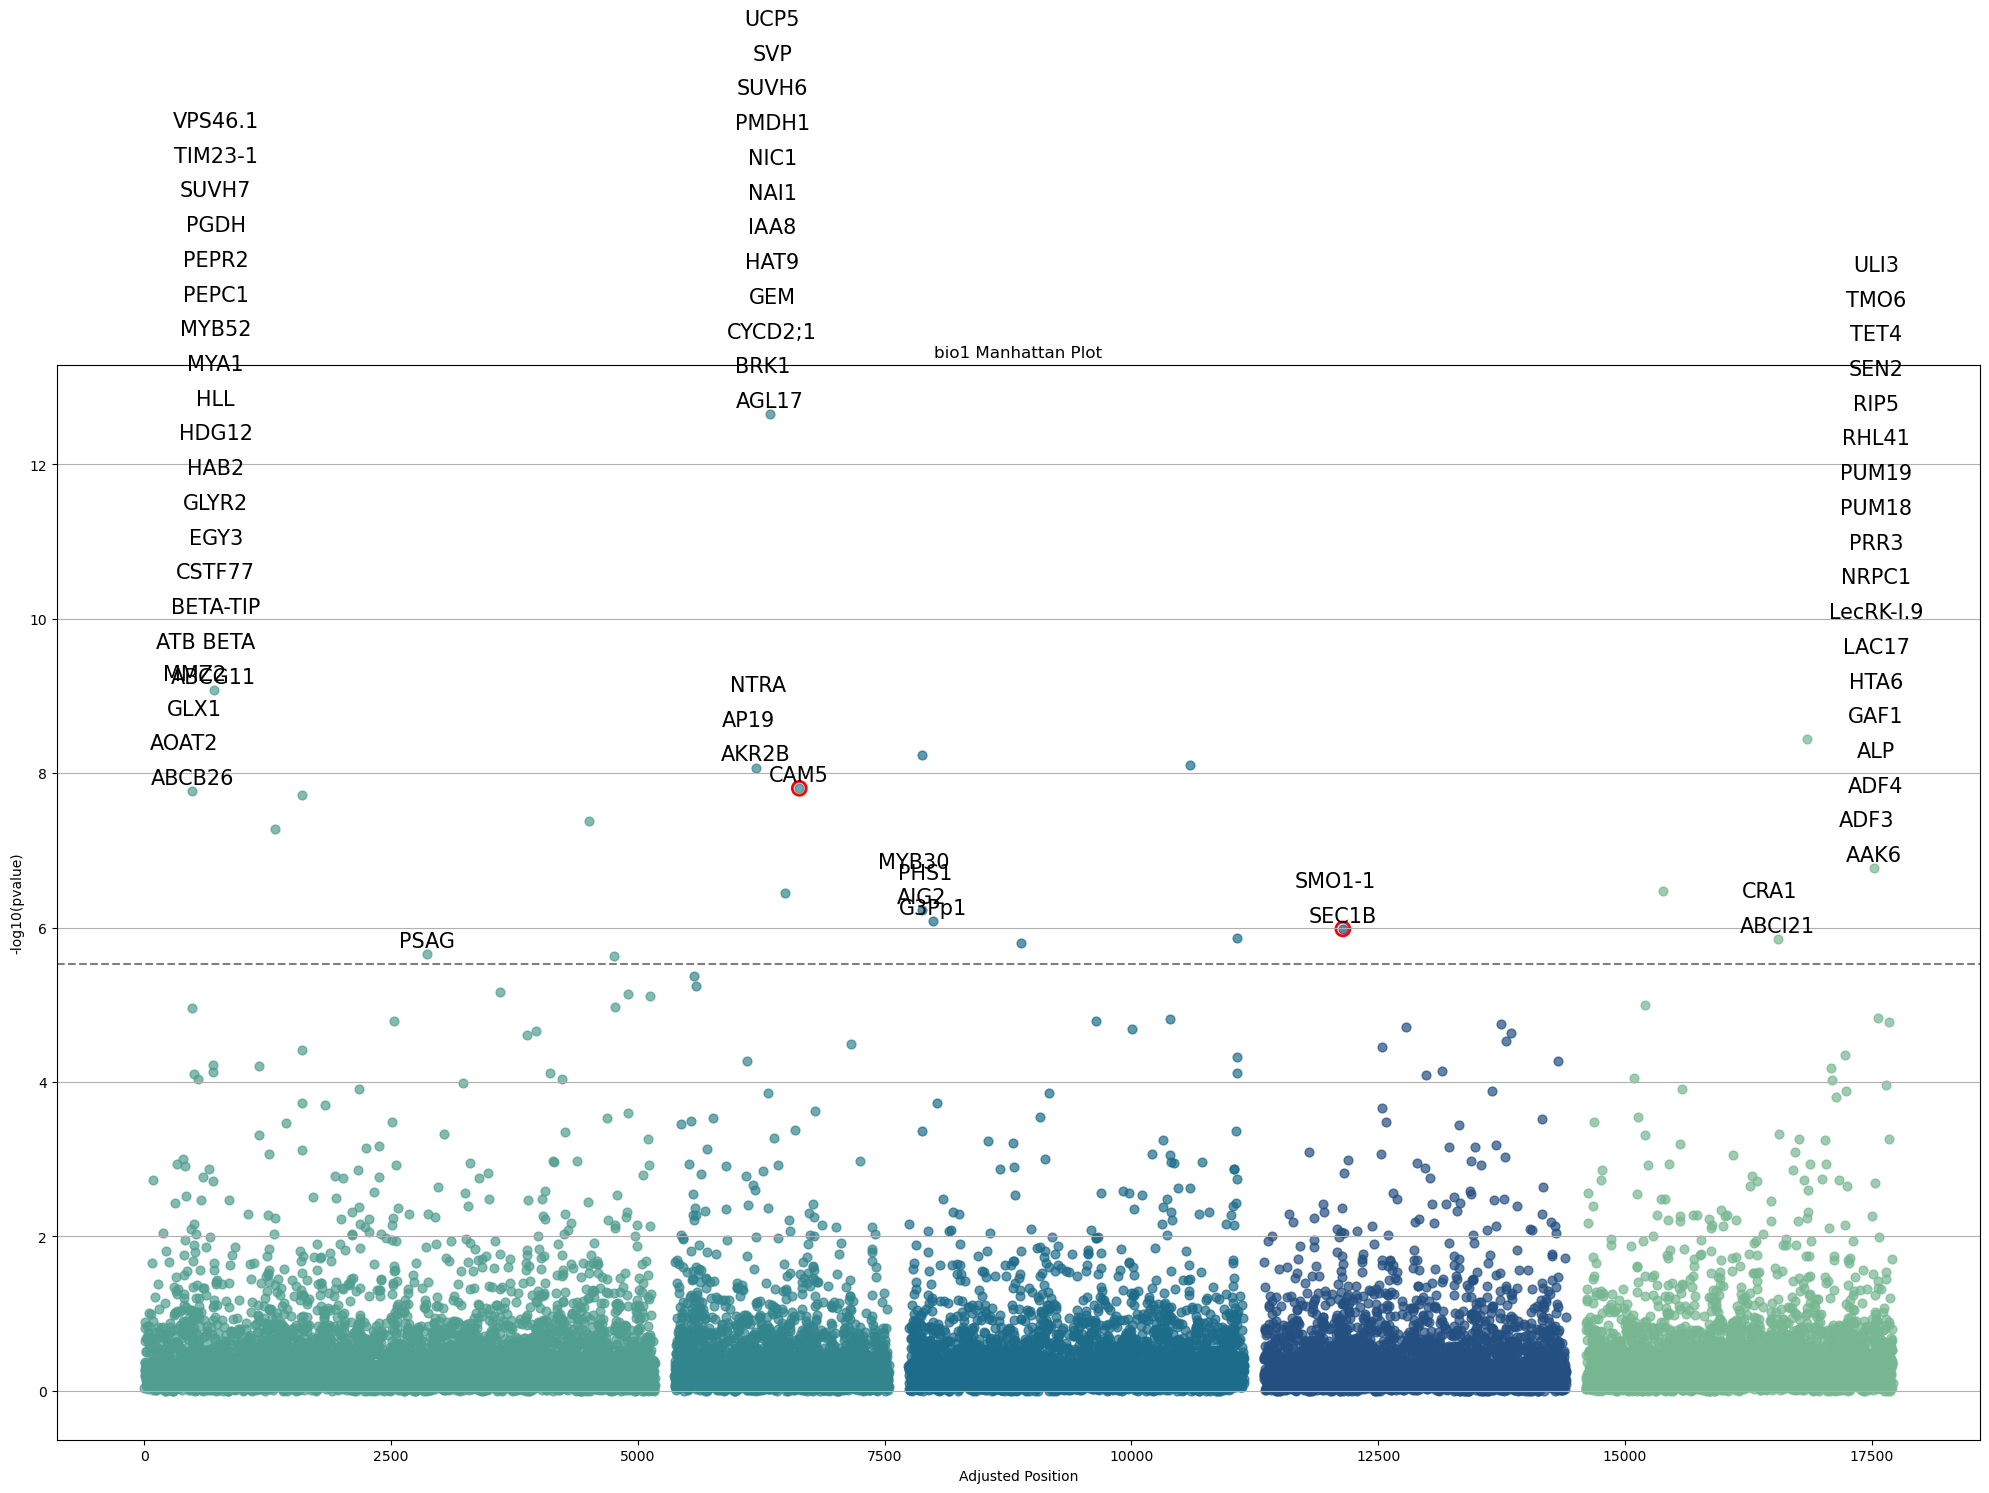

In [72]:
# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define colors for each chromosome
colors = sns.color_palette("crest", n_colors=5)

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 15))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7, 
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
        s=40
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')
plt.grid(axis='y')

# Add a threshold line for significance
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Identify significant blocks in wza_lfmm
significant_blocks = df[df['-log10(pvalue)'] >= threshold]

# Merge significant blocks with the annotation dataframe based on chrom_pos and block
annotated_blocks = significant_blocks.merge(annot, left_on='chrom_pos', right_on='block', how='inner')

# Annotate the significant points with 'gene_name' and space annotations vertically
# Annotate the significant points with 'gene_name' and space annotations both horizontally and vertically
for chrom_pos, group in annotated_blocks.groupby('block'):
    # Sort the group by gene_name to ensure consistent ordering
    group = group.sort_values(by='gene_name')
    
    # Set initial offsets for annotations
    vertical_offset = 0  
    horizontal_offset = 0
    previous_position = None  # Track the previous annotation position
    
    for i, row in group.iterrows():
        current_position = row['adjusted_position']
        
        # Adjust vertical and horizontal offsets if positions are too close
        if previous_position is not None and abs(current_position - previous_position) < 50:
            vertical_offset += 25  # Increase vertical offset for close annotations
            horizontal_offset = (-80 if horizontal_offset == 0 else 20)  # Alternate horizontal offset left/right
        else:
            vertical_offset = 0  # Reset vertical offset if there's enough distance
            horizontal_offset = 0  # Reset horizontal offset
        
        # Annotate the plot with gene name, applying both vertical and horizontal adjustments
        plt.annotate(
            row['gene_name'], 
            (row['adjusted_position'] + horizontal_offset, row['-log10(pvalue)']),
            textcoords="offset points",  # Specify the offset point for the text
            xytext=(0, 5 + vertical_offset),  # Increment vertical offset for each annotation
            ha='center',    # Align horizontally to center
            fontsize=15,
            color='black',
            
        )
        
        # Update previous position for the next comparison
        previous_position = current_position

# Highlight specific genes if needed
genes = ['2_1265', '4_801']  # List of specific genes to highlight
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',
            linewidth=2,
            facecolor='none',
            s=100,
            label=f'Gene {gene}'
        )

plt.tight_layout()
plt.show()
